In [12]:
import tensorflow as tf

In [13]:
BASE_DIR = "D:\datasets"
BASE_DIR

'D:\\datasets'

In [14]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 5,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.2,
    zoom_range = 0.2,
#     zoom_range=[1.0,1.7],
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [16]:
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VALIDATION_DIR = os.path.join(BASE_DIR, 'validation')

print(os.listdir(TRAIN_DIR))
print(os.listdir(VALIDATION_DIR))

['abir', 'bobi', 'rafi']
['abir', 'bobi', 'rafi']


In [18]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = (300, 300),
    class_mode = 'categorical',
    batch_size = 20
)

Found 17700 images belonging to 3 classes.


In [19]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (300, 300),
    class_mode = 'categorical',
    batch_size = 20
)

Found 7300 images belonging to 3 classes.


In [21]:
import matplotlib.pyplot as plt

x, y = train_generator.next() # return first batch of image or 10 images

print(x[0].shape)

(300, 300, 3)


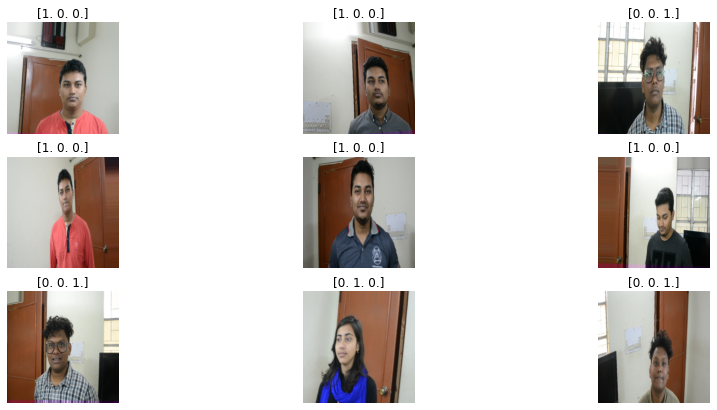

In [22]:
fig, ax = plt.subplots(3,3, figsize=(15, 7))

idx = 0
for i in range(3):
    for j in range(3):
        ax[i, j].imshow(x[idx])
        ax[i, j].set_title(y[idx])
        ax[i, j].axis('off')
        idx +=1

plt.show()

In [23]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 33, 33, 128)      

In [25]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [26]:
history = model.fit(train_generator, epochs=10, steps_per_epoch=20,
                    validation_data=validation_generator, verbose=1, validation_steps=3)


Epoch 1/10
20/20 [==============================] - 29s 1s/step - loss: 3.8161 - accuracy: 0.3450 - val_loss: 1.0756 - val_accuracy: 0.3167
Epoch 2/10
20/20 [==============================] - 28s 1s/step - loss: 0.8787 - accuracy: 0.5725 - val_loss: 0.7231 - val_accuracy: 0.6500
Epoch 3/10
20/20 [==============================] - 27s 1s/step - loss: 0.6691 - accuracy: 0.6850 - val_loss: 0.4913 - val_accuracy: 0.7833
Epoch 4/10
20/20 [==============================] - 27s 1s/step - loss: 0.7422 - accuracy: 0.6950 - val_loss: 0.4055 - val_accuracy: 0.8667
Epoch 5/10
20/20 [==============================] - 26s 1s/step - loss: 0.7037 - accuracy: 0.6975 - val_loss: 0.5366 - val_accuracy: 0.7667
Epoch 6/10
20/20 [==============================] - 26s 1s/step - loss: 0.5241 - accuracy: 0.7750 - val_loss: 0.1703 - val_accuracy: 0.9500
Epoch 7/10
20/20 [==============================] - 26s 1s/step - loss: 0.4162 - accuracy: 0.8350 - val_loss: 0.4664 - val_accuracy: 0.8667
Epoch 8/10
20/20 [==

In [27]:
model.save('./models/val-acc-93-percent.h5')

In [61]:
TEST_BASE = r"C:\Users\user\Desktop\Home Security"
test_dir = os.path.join(TEST_BASE, 'test_images')
len(os.listdir(test_dir))

40

In [62]:
list_dir = os.listdir(test_dir)
list_dir

['abir1.jpg',
 'abir10.jpg',
 'abir2.jpg',
 'abir4.jpg',
 'abir5.jpg',
 'abir6.jpg',
 'abir8.jpg',
 'bobi2.jpg',
 'bobi3.jpg',
 'bobi5.jpg',
 'bobi7.jpg',
 'bobi8.jpg',
 'rafi1.jpg',
 'rafi2.jpg',
 'rafi3.jpg',
 'rafi6.jpg',
 'rafi9.jpg',
 'subject01_007522.jpg',
 'subject01_007523.jpg',
 'subject01_007525.jpg',
 'subject01_007526.jpg',
 'subject01_007534.jpg',
 'subject01_007536.jpg',
 'subject01_007538.jpg',
 'subject01_007539.jpg',
 'subject02_006238.jpg',
 'subject02_006239.jpg',
 'subject02_006240.jpg',
 'subject02_006241.jpg',
 'subject02_006242.jpg',
 'subject02_006251.jpg',
 'subject02_006252.jpg',
 'subject02_006253.jpg',
 'subject02_006254.jpg',
 'subject03_005652.jpg',
 'subject03_005653.jpg',
 'subject03_005657.jpg',
 'subject03_005658.jpg',
 'subject03_005659.jpg',
 'subject03_005661.jpg']

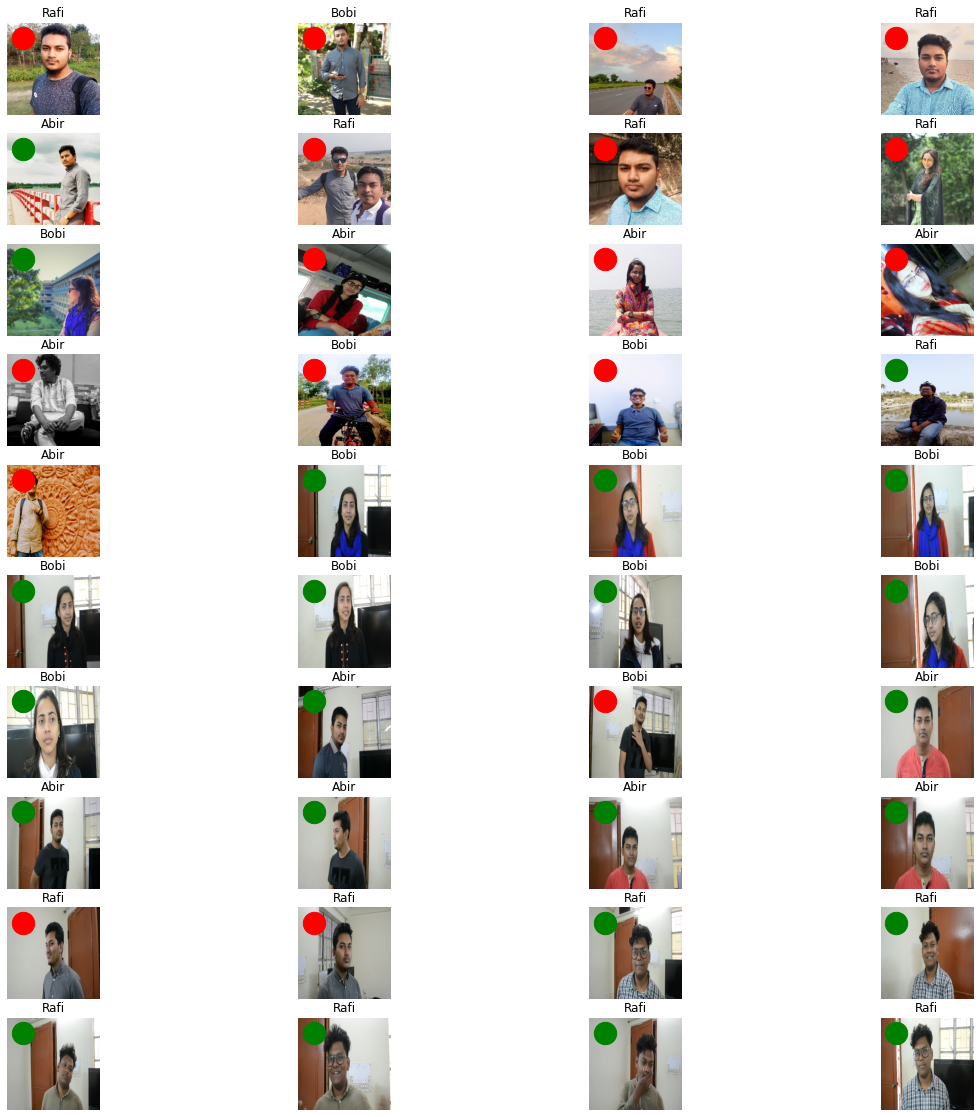

In [72]:
from tensorflow.keras.preprocessing import image
import numpy as np

fig, ax = plt.subplots(10, 4, figsize=(20, 20))

idx = 0
for i in range(10):
    for j in range(4):
        image_path = os.path.join(os.path.join(os.getcwd(), 'test_images'), list_dir[idx])
        
        img = image.load_img(image_path, target_size=(300, 300))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        
        ax[i, j].imshow(img)
      
    
        res = model.predict(x)
        if res[0][0] == 1:
#             print(" Abir")
            ax[i, j].set_title("Abir")
            if (list_dir[idx][0] == 'a' or list_dir[idx][8] == '2'):
                ax[i, j].scatter(50, 50, s=500, c='green', marker='o')
            else: 
                ax[i, j].scatter(50, 50, s=500, c='red', marker='o')

        elif res[0][1] == 1:
#             print(" Bobi")
            ax[i, j].set_title("Bobi")
            if (list_dir[idx][0] == 'b' or list_dir[idx][8] == '1'):
                ax[i, j].scatter(50, 50, s=500, c='green', marker='o')
            else: 
                ax[i, j].scatter(50, 50, s=500, c='red', marker='o')

        elif res[0][2] == 1:
#         print("Rafi")
            ax[i, j].set_title("Rafi")
            if (list_dir[idx][0] == 'r' or list_dir[idx][8] == '3'):
                ax[i, j].scatter(50, 50, s=500, c='green', marker='o')
            else: 
                ax[i, j].scatter(50, 50, s=500, c='red', marker='o')
        ax[i, j].axis('off')
        idx += 1
    
    
plt.show()